In [1]:
# standart libs
import sys
import random
import copy
from operator import itemgetter
from PIL import Image


# 3rd party libs
import pandas as pd
import numpy as np
import gempy as gp
import matplotlib.pyplot as plt
import scipy.stats as ss
from skimage import measure
from matplotlib import gridspec


# local
import functions.realization_setup as real_setup
import functions.realization_run as real_run
import functions.post_processing as post_pro
import functions.uq_runs as uq_runs

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# create basic form
xsim = np.linspace(0, 2 * np.pi, 1000)
ysim = np.cos(xsim) * (-1)
# rescale
xsim = (xsim / (2 * np.pi)) * 1000
ysim = (ysim + 1) * 250 + 250
# sparse
xvals = xsim[::50]
yvals = ysim[::50]
yerrs = np.random.normal(0,1,yvals.shape)
# err alternative
_x = np.linspace(0,np.pi,yvals.shape[0])
_y = np.sin(_x)
_x = (_x / 3.141592653589793) * 1000
yerrs = _y * 50

# anker
x, y = 500, 300
xx, yy = np.arange(1000), np.arange(1000)
X, Y = np.meshgrid(xx, yy)
D = np.sqrt( (X - x) ** 2 + (Y - y) ** 2 )

# errors
dists = np.sqrt((xvals - x) ** 2 + (yvals - y) ** 2)
xgrav = 1 / dists ** 2
yforce = xgrav * np.abs(yerrs) * 20000
yvals_new = yvals - yforce
yerr = yforce -10

In [10]:
dists = np.sqrt((xvals - x) ** 2 + (yvals - y) ** 2)
xgrav = 1 / dists ** 2
yforce = xgrav * np.abs(yerrs) * 200000
yvals_new = yvals - yforce
yerr = yforce -10

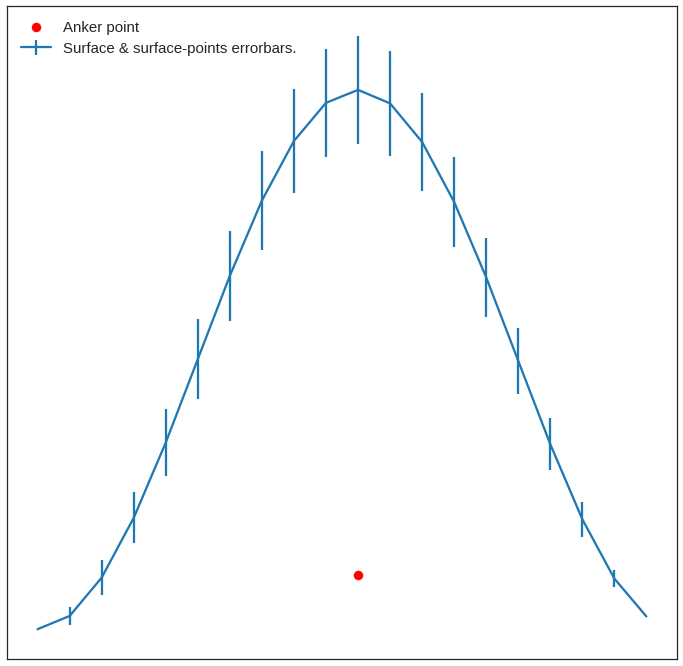

In [18]:
fig, (ax0) = plt.subplots(nrows=1, ncols=1, constrained_layout=False, figsize=(12, 12))

ax0.errorbar(xvals, yvals, yerr=yerrs, uplims=False, lolims=False, label='Surface & surface-points errorbars.')
ax0.scatter(x, y, c='red', label='Anker point')
ax0.set_yticklabels([])
ax0.set_xticklabels([])
ax0.legend(loc='upper left', fontsize=15)
# ax0.imshow(D, colormap='viridis')

#ax1.plot(xvals, yvals, linewidth=3.0, c='steelblue')
#ax1.errorbar(xvals, yvals, yerr=yerr, uplims=True, c='steelblue')
#ax1.plot(xvals, yvals_new, linewidth=3.0, c='orange')
#ax1.scatter(x, y, c='red')
#ax1.set_yticklabels([])
#ax1.set_xticklabels([])
fig.savefig('../document/figures/discussion_anker_0.png')

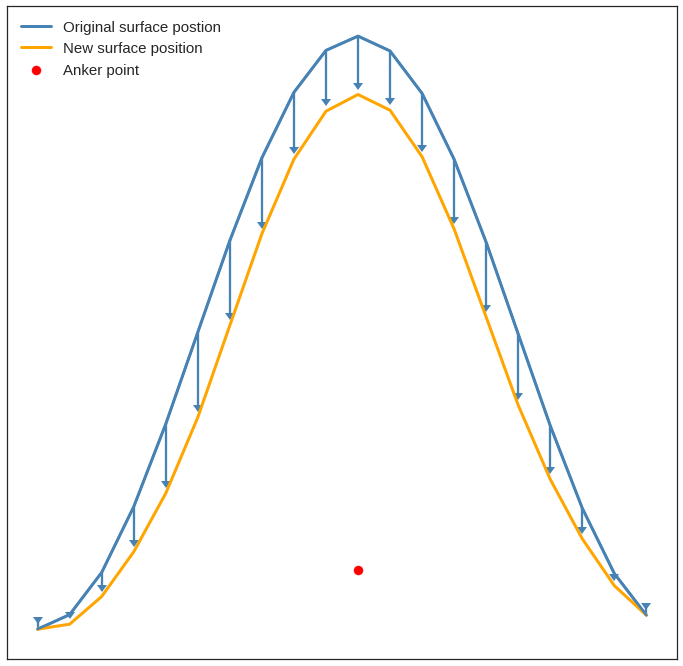

In [20]:
fig, (ax0) = plt.subplots(nrows=1, ncols=1, constrained_layout=False, figsize=(12, 12))

ax0.plot(xvals, yvals, linewidth=3.0, c='steelblue', label='Original surface postion')
ax0.errorbar(xvals, yvals, yerr=yerr, uplims=True, c='steelblue')
ax0.plot(xvals, yvals_new, linewidth=3.0, c='orange', label='New surface position')
ax0.scatter(x, y, c='red', label='Anker point')
ax0.set_yticklabels([])
ax0.set_xticklabels([])
ax0.legend(loc='upper left', fontsize=15)
fig.savefig('../document/figures/discussion_anker_1.png')